운동 종류를 입력하세요 ('스쿼트', '푸쉬업'): 스쿼트
스쿼트 운동 횟수: 0회


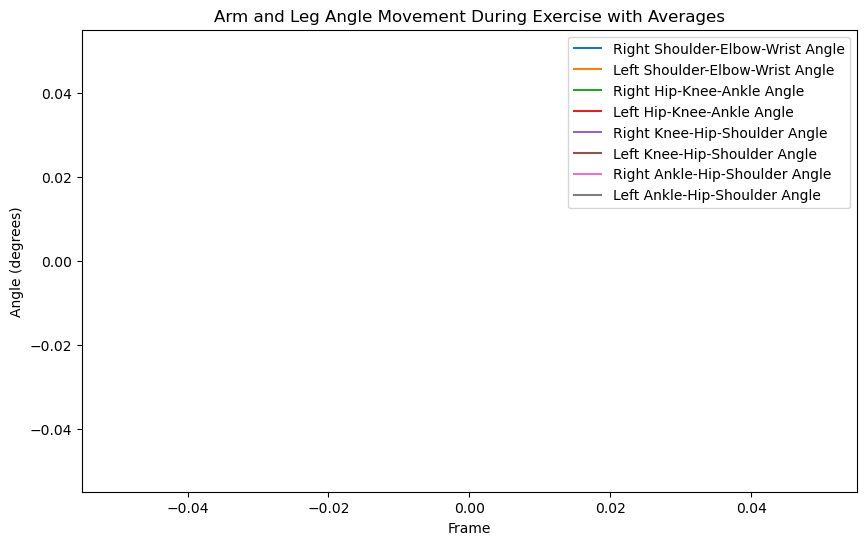

In [1]:
# 앵글 그래프 그리기
# 실시간으로 각도 출력
# 스쿼트 자세 카운트, 틀린자세 판별
# 푸쉬업 자세 카운트, 틀린자세 판별

import numpy as np
import cv2
import mediapipe as mp
import math
import matplotlib.pyplot as plt
import time


# 미디어파이프 모듈 초기화
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils  # Add this line

# 각 관절의 인덱스
JOINTS = {
    "right_shoulder": 12,
    "right_elbow": 14,
    "right_wrist": 16,
    "left_shoulder": 11,
    "left_elbow": 13,
    "left_wrist": 15,
    "right_hip": 24,
    "right_knee": 26,
    "right_ankle": 28,
    "left_hip": 23,
    "left_knee": 25,
    "left_ankle": 27,
}

# 각 앵글을 계산하는 함수
def calculate_angle(a, b, c):
    radians = math.atan2(c[1] - b[1], c[0] - b[0]) - math.atan2(a[1] - b[1], a[0] - b[0])
    angle = math.degrees(radians)
    return angle + 360 if angle < 0 else angle

# 카메라 설정
cap = cv2.VideoCapture(0)

# 데이터 기록을 위한 리스트
right_shoulder_elbow_wrist_angles = []
left_shoulder_elbow_wrist_angles = []
right_hip_knee_ankle_angles = []
left_hip_knee_ankle_angles = []
right_knee_hip_shoulder_angles = []
left_knee_hip_shoulder_angles = []
right_ankle_hip_shoulder_angles = []
left_ankle_hip_shoulder_angles = []

# 카운트 초기화
count = 0
count_s = -1
detected = False
less_count = False
more_count = False



# 사용자에게 운동 종류 입력받기
exercise_type = input("운동 종류를 입력하세요 ('스쿼트', '푸쉬업'): ")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
     # 좌우 반전
#     frame = cv2.flip(frame, 1)  # 1은 수평 방향으로 뒤집음

    # RGB로 변환
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 미디어파이프를 사용하여 관절 포인트 감지
    results = pose.process(rgb_frame)

    if results.pose_landmarks:
        # 앵글 계산
        right_shoulder = (int(results.pose_landmarks.landmark[JOINTS["right_shoulder"]].x * frame.shape[1]),
                          int(results.pose_landmarks.landmark[JOINTS["right_shoulder"]].y * frame.shape[0]))
        right_elbow = (int(results.pose_landmarks.landmark[JOINTS["right_elbow"]].x * frame.shape[1]),
                       int(results.pose_landmarks.landmark[JOINTS["right_elbow"]].y * frame.shape[0]))
        right_wrist = (int(results.pose_landmarks.landmark[JOINTS["right_wrist"]].x * frame.shape[1]),
                       int(results.pose_landmarks.landmark[JOINTS["right_wrist"]].y * frame.shape[0]))

        left_shoulder = (int(results.pose_landmarks.landmark[JOINTS["left_shoulder"]].x * frame.shape[1]),
                         int(results.pose_landmarks.landmark[JOINTS["left_shoulder"]].y * frame.shape[0]))
        left_elbow = (int(results.pose_landmarks.landmark[JOINTS["left_elbow"]].x * frame.shape[1]),
                      int(results.pose_landmarks.landmark[JOINTS["left_elbow"]].y * frame.shape[0]))
        left_wrist = (int(results.pose_landmarks.landmark[JOINTS["left_wrist"]].x * frame.shape[1]),
                      int(results.pose_landmarks.landmark[JOINTS["left_wrist"]].y * frame.shape[0]))

        right_hip = (int(results.pose_landmarks.landmark[JOINTS["right_hip"]].x * frame.shape[1]),
                     int(results.pose_landmarks.landmark[JOINTS["right_hip"]].y * frame.shape[0]))
        right_knee = (int(results.pose_landmarks.landmark[JOINTS["right_knee"]].x * frame.shape[1]),
                       int(results.pose_landmarks.landmark[JOINTS["right_knee"]].y * frame.shape[0]))
        right_ankle = (int(results.pose_landmarks.landmark[JOINTS["right_ankle"]].x * frame.shape[1]),
                      int(results.pose_landmarks.landmark[JOINTS["right_ankle"]].y * frame.shape[0]))

        left_hip = (int(results.pose_landmarks.landmark[JOINTS["left_hip"]].x * frame.shape[1]),
                    int(results.pose_landmarks.landmark[JOINTS["left_hip"]].y * frame.shape[0]))
        left_knee = (int(results.pose_landmarks.landmark[JOINTS["left_knee"]].x * frame.shape[1]),
                     int(results.pose_landmarks.landmark[JOINTS["left_knee"]].y * frame.shape[0]))
        left_ankle = (int(results.pose_landmarks.landmark[JOINTS["left_ankle"]].x * frame.shape[1]),
                       int(results.pose_landmarks.landmark[JOINTS["left_ankle"]].y * frame.shape[0]))

        # 각 앵글 계산
        right_shoulder_elbow_wrist_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
        left_shoulder_elbow_wrist_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
        right_hip_knee_ankle_angle = calculate_angle(right_hip, right_knee, right_ankle)
        left_hip_knee_ankle_angle = calculate_angle(left_hip, left_knee, left_ankle)
        right_knee_hip_shoulder_angle = calculate_angle(right_knee, right_hip, right_shoulder)
        left_knee_hip_shoulder_angle = calculate_angle(left_knee, left_hip, left_shoulder)
        right_ankle_hip_shoulder_angle = calculate_angle(right_ankle, right_hip, right_shoulder)
        left_ankle_hip_shoulder_angle = calculate_angle(left_ankle, left_hip, left_shoulder)

        # 결과를 리스트에 기록
        right_shoulder_elbow_wrist_angles.append(right_shoulder_elbow_wrist_angle)
        left_shoulder_elbow_wrist_angles.append(left_shoulder_elbow_wrist_angle)
        right_hip_knee_ankle_angles.append(right_hip_knee_ankle_angle)
        left_hip_knee_ankle_angles.append(left_hip_knee_ankle_angle)
        right_knee_hip_shoulder_angles.append(right_knee_hip_shoulder_angle)
        left_knee_hip_shoulder_angles.append(left_knee_hip_shoulder_angle)
        right_ankle_hip_shoulder_angles.append(right_ankle_hip_shoulder_angle)
        left_ankle_hip_shoulder_angles.append(left_ankle_hip_shoulder_angle)

        # 결과를 화면에 표시
#         cv2.putText(frame, f"Right Shoulder-Elbow-Wrist Angle: {right_shoulder_elbow_wrist_angle:.2f}",
#                     (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
#         cv2.putText(frame, f"Left Shoulder-Elbow-Wrist Angle: {left_shoulder_elbow_wrist_angle:.2f}",
#                     (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
#         cv2.putText(frame, f"Right Hip-Knee-Ankle Angle: {right_hip_knee_ankle_angle:.2f}",
#                     (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
#         cv2.putText(frame, f"Left Hip-Knee-Ankle Angle: {left_hip_knee_ankle_angle:.2f}",
#                     (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
#         cv2.putText(frame, f"Right Knee-Hip-Shoulder Angle: {left_hip_knee_ankle_angle:.2f}",
#                     (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
#         cv2.putText(frame, f"Left Knee-Hip-Shoulder Angle: {left_hip_knee_ankle_angle:.2f}",
#                     (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
#         cv2.putText(frame, f"Right Hip-Knee-Ankle Angle: {left_hip_knee_ankle_angle:.2f}",
#                     (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
#         cv2.putText(frame, f"Left Hip-Knee-Ankle Angle: {left_hip_knee_ankle_angle:.2f}",
#                     (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
        # 스쿼트 감지
        if exercise_type.lower() == '스쿼트':
#             준비자세
            right_squat = 140 <= right_hip_knee_ankle_angle <= 200
            left_squat = 140 <= left_hip_knee_ankle_angle <= 200

#         준비자세가 되면
            if right_squat and left_squat :
                if not detected :
                    count_s += 1
                        # detected 완벽한 자세 감지
                    detected = True
                    if count_s > 0:
                        print(f"운동 횟수: {count_s}회")
                        count = count_s
                if less_count :
                    print('덜 앉음')
                    less_count = False

                if more_count :
                    print('깊게 앉음')
                    more_count = False

                        
            #  덜앉음
            if (220 <= right_hip_knee_ankle_angle < 250 and 220 <= left_hip_knee_ankle_angle < 250) or \
                (100 <= right_hip_knee_ankle_angle < 140 and 100 <= left_hip_knee_ankle_angle < 140) and not (
                right_squat and left_squat) :
                if detected and not more_count:
                    less_count = True
                
            # 앉았을 때
            if (80 <= right_hip_knee_ankle_angle <= 100 or 80 <= left_hip_knee_ankle_angle <= 100) or \
                    (250 <= right_hip_knee_ankle_angle <= 270 or 250 <= left_hip_knee_ankle_angle <= 270) and not (right_squat and left_squat):
                    if not more_count:
                        detected = False
                        less_count = False

               # 깊게 앉음
            if (0 <= right_knee_hip_shoulder_angle <= 50 or 0 <= left_knee_hip_shoulder_angle <= 50) or \
                        (300 <= right_knee_hip_shoulder_angle <= 350 or 300 <= left_knee_hip_shoulder_angle <= 350):
                more_count = True
                detected = True
                less_count = False




        # 푸쉬업 감지
        if exercise_type.lower() == '푸쉬업':
            right_pushup = 150 <= right_shoulder_elbow_wrist_angle <= 210
            left_pushup = 150 <= left_shoulder_elbow_wrist_angle <= 210
            pushup_hip = 160 <= right_ankle_hip_shoulder_angle <= 200 and 160 <= left_ankle_hip_shoulder_angle <= 200
            
            if right_pushup and left_pushup and pushup_hip:
                if not detected :
                    count_s += 1
                    detected = True
                    if count_s > 0:
                        print(f"운동 횟수: {count_s}회")
                        count = count_s
                if less_count :
                    print('팔 덜 내림')
                    less_count = False
                if more_count :
                    more_count = False
            
            # 팔 덜굽힐 때
            if (100 <= right_shoulder_elbow_wrist_angle <= 140 and 100 <= left_shoulder_elbow_wrist_angle <= 140) or \
                (220 <= right_shoulder_elbow_wrist_angle <= 260 and 220 <= left_shoulder_elbow_wrist_angle <= 260 ) and not \
                (right_pushup and left_pushup) :
                if detected :
                    less_count = True
                
            # 팔이 벌어지고 다시 펴졌을 때
            if (40 <= right_shoulder_elbow_wrist_angle <= 80 or 40 <= left_shoulder_elbow_wrist_angle <= 80) or (270<= right_shoulder_elbow_wrist_angle <= 330 or 270 <= left_shoulder_elbow_wrist_angle <= 330) and not (right_pushup or left_pushup) :
                if not more_count :
                    detected = False
                    less_count = False
                
            # 엉덩이 높이 벗어날 때
            if not pushup_hip :
                if not more_count :
                    detected = True
                    more_count = True
                    print('엉덩이 벗어남')
 
            
        
        # 관절을 선으로 이어서 그리기
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        

    # 화면에 출력
    cv2.imshow('Pose Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

print(f"{exercise_type} 운동 횟수: {count}회")        
        
cap.release()
cv2.destroyAllWindows()

# 평균값 계산
# right_shoulder_elbow_wrist_avg = sum(right_shoulder_elbow_wrist_angles) / len(right_shoulder_elbow_wrist_angles)
# left_shoulder_elbow_wrist_avg = sum(left_shoulder_elbow_wrist_angles) / len(left_shoulder_elbow_wrist_angles)
# right_hip_knee_ankle_avg = sum(right_hip_knee_ankle_angles) / len(right_hip_knee_ankle_angles)
# left_hip_knee_ankle_avg = sum(left_hip_knee_ankle_angles) / len(left_hip_knee_ankle_angles)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(right_shoulder_elbow_wrist_angles, label='Right Shoulder-Elbow-Wrist Angle')
plt.plot(left_shoulder_elbow_wrist_angles, label='Left Shoulder-Elbow-Wrist Angle')
plt.plot(right_hip_knee_ankle_angles, label='Right Hip-Knee-Ankle Angle')
plt.plot(left_hip_knee_ankle_angles, label='Left Hip-Knee-Ankle Angle')
#평균값 그래프
# plt.axhline(right_shoulder_elbow_wrist_avg, color='r', linestyle='dashed', linewidth=2, label='Right Shoulder-Elbow-Wrist Avg')
# plt.axhline(left_shoulder_elbow_wrist_avg, color='b', linestyle='dashed', linewidth=2, label='Left Shoulder-Elbow-Wrist Avg')
# plt.axhline(right_hip_knee_ankle_avg, color='g', linestyle='dashed', linewidth=2, label='Right Hip-Knee-Ankle Avg')
# plt.axhline(left_hip_knee_ankle_avg, color='purple', linestyle='dashed', linewidth=2, label='Left Hip-Knee-Ankle Avg')
plt.plot(right_knee_hip_shoulder_angles, label='Right Knee-Hip-Shoulder Angle')
plt.plot(left_knee_hip_shoulder_angles, label='Left Knee-Hip-Shoulder Angle')
plt.plot(right_ankle_hip_shoulder_angles, label='Right Ankle-Hip-Shoulder Angle')
plt.plot(left_ankle_hip_shoulder_angles, label='Left Ankle-Hip-Shoulder Angle')
plt.xlabel('Frame')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.title('Arm and Leg Angle Movement During Exercise with Averages')

plt.show()
